# Comparison of raw SP-CAM runs: Standard vs FBP vs FBP-32cols

Goal: Check differences

- Mean climate
- Variability

Summary:

- Standard and fluxbypass runs are very similar
- 32 col run has quite a bit less variability

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import *

/export/home/srasp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
REFDIR = '/scratch/srasp/Aquaplanet_enhance05/'
FBPDIR = '/scratch/srasp/fluxbypass_aqua/'
FBP32DIR = '/beegfs/DATA/pritchard/srasp/fluxbypass_aqua32/'

In [4]:
# How many files are in each directory
reffns = sorted(glob(f'{REFDIR}AndKua*h1*'))
fbpfns = sorted(glob(f'{FBPDIR}AndKua*h1*'))
fbp32fns = sorted(glob(f'{FBP32DIR}AndKua*h1*'))
len(reffns), len(fbpfns), len(fbp32fns)

(733, 733, 444)

In [5]:
%%time
# Only load every tenth file from the first year
dref = xr.open_mfdataset(reffns[0:361:5], decode_times=False, decode_cf=False)
df8 = xr.open_mfdataset(fbpfns[0:361:5], decode_times=False, decode_cf=False)
df32 = xr.open_mfdataset(fbp32fns[0:361:5], decode_times=False, decode_cf=False)

CPU times: user 24.7 s, sys: 679 ms, total: 25.4 s
Wall time: 3min 37s


In [6]:
def comp(func, **kwargs):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    [func(d).plot(ax=ax, **kwargs) for d, ax in zip([dref, df8, df32], axes.flat)]

In [7]:
def comp_line(func, **kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    [func(d).plot(ax=ax, label=l, **kwargs) for d, l in zip([dref, df8, df32], ['Ref', 'FBP 8', 'FBP32'])]
    plt.legend()

## Mean climate

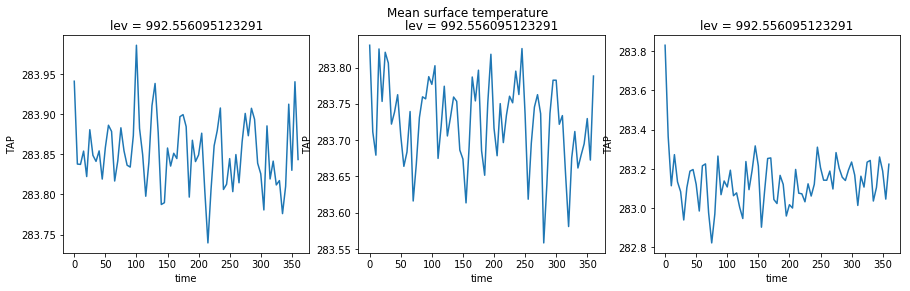

In [8]:
comp(lambda d: d['TAP'].isel(time=slice(0, None, 48), lev=-1).mean(('lat', 'lon')))
plt.gcf().suptitle('Mean surface temperature'); 

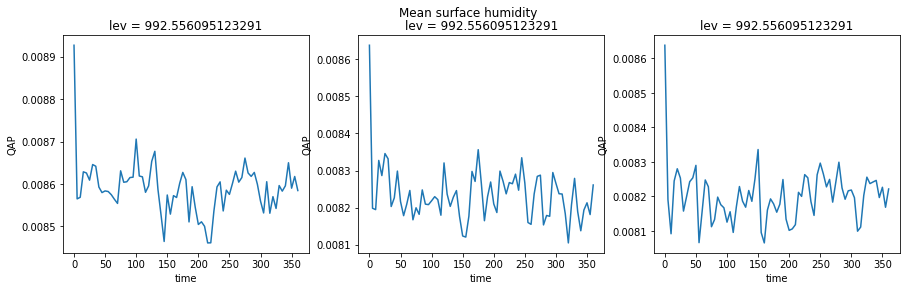

In [9]:
comp(lambda d: d['QAP'].isel(time=slice(0, None, 48), lev=-1).mean(('lat', 'lon')))
plt.gcf().suptitle('Mean surface humidity');

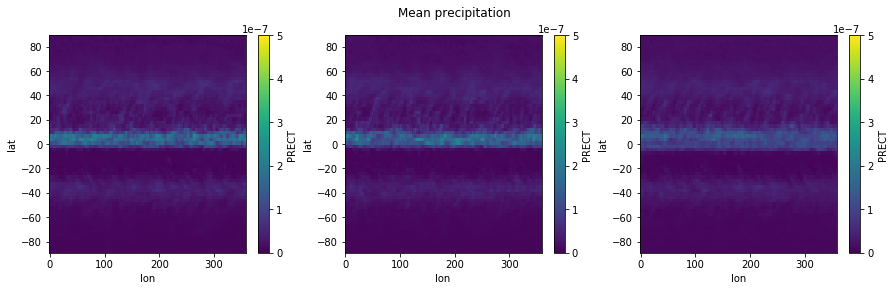

In [10]:
comp(lambda d: d['PRECT'].mean('time'), vmin=0, vmax=5e-7)
plt.gcf().suptitle('Mean precipitation'); 

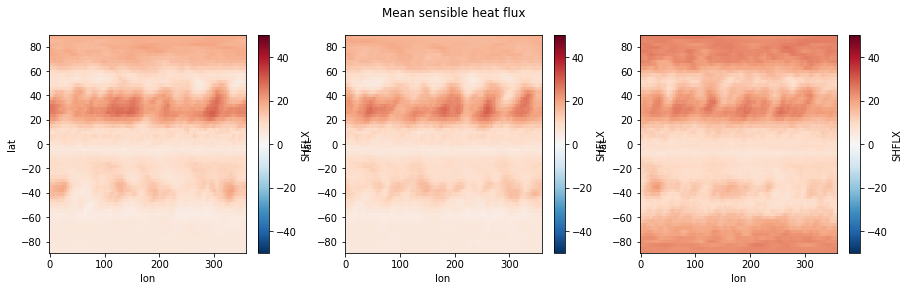

In [11]:
comp(lambda d: d['SHFLX'].mean('time'), vmin=-50, vmax=50, cmap='RdBu_r')
plt.gcf().suptitle('Mean sensible heat flux');

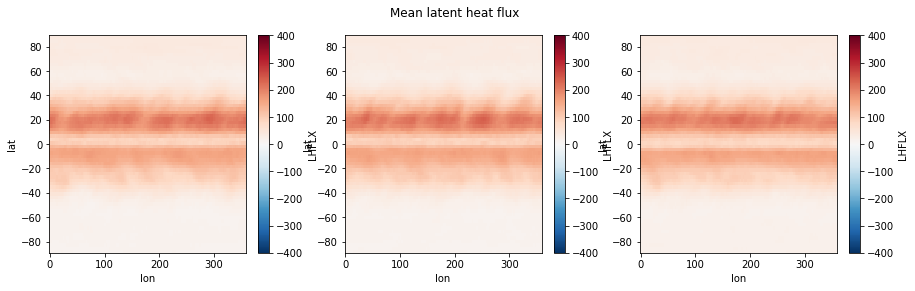

In [12]:
comp(lambda d: d['LHFLX'].mean('time'), vmin=-400, vmax=400, cmap='RdBu_r')
plt.gcf().suptitle('Mean latent heat flux'); 

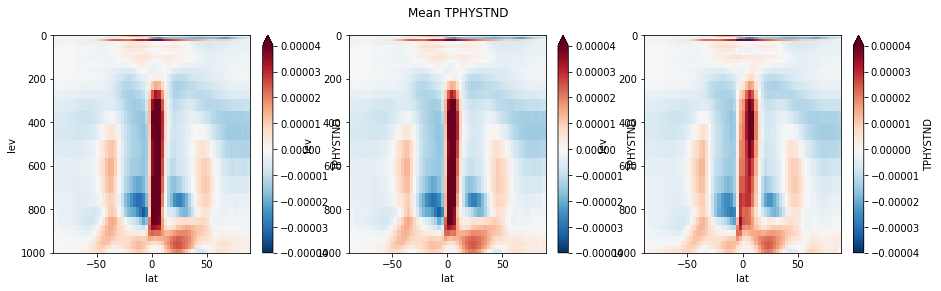

In [13]:
comp(lambda d: d['TPHYSTND'].isel(time=slice(0, None, 4)).mean(('lon', 'time')), yincrease=False, 
     vmin=-4e-5, vmax=4e-5, cmap='RdBu_r')
plt.gcf().suptitle('Mean TPHYSTND'); 

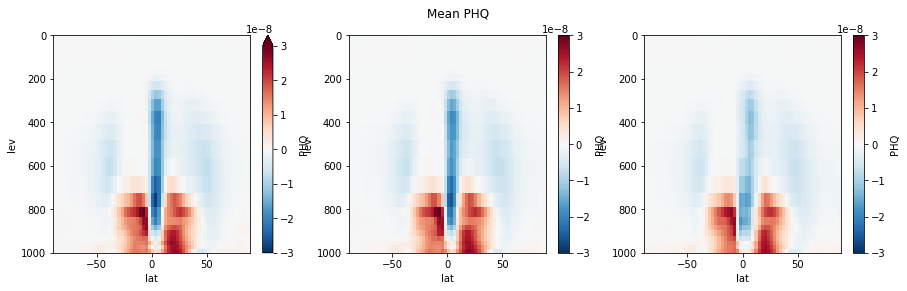

In [14]:
comp(lambda d: d['PHQ'].isel(time=slice(0, None, 4)).mean(('lon', 'time')), yincrease=False, 
     vmin=-3e-8, vmax=3e-8, cmap='RdBu_r')
plt.gcf().suptitle('Mean PHQ'); 

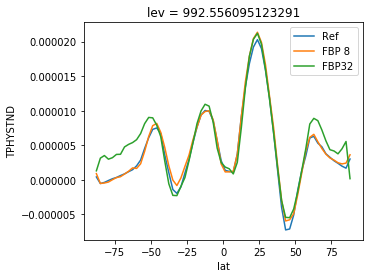

In [15]:
comp_line(lambda d: d['TPHYSTND'].isel(lev=-1).mean(('lon', 'time')))

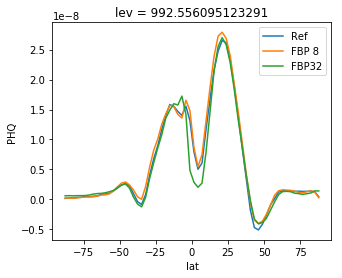

In [16]:
comp_line(lambda d: d['PHQ'].isel(lev=-1).mean(('lon', 'time')))

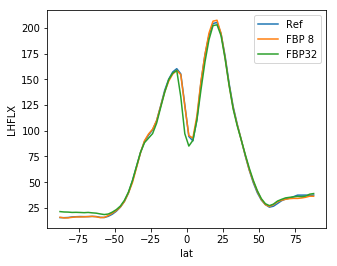

In [17]:
comp_line(lambda d: d['LHFLX'].mean(('lon', 'time')))

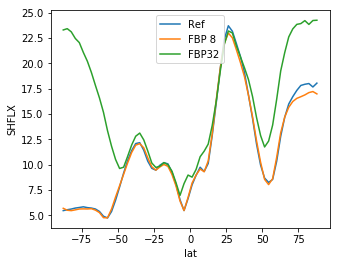

In [18]:
comp_line(lambda d: d['SHFLX'].mean(('lon', 'time')))

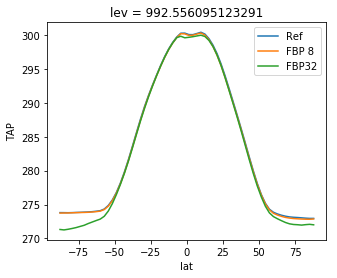

In [27]:
comp_line(lambda d: d['TAP'].isel(lev=-1).mean(('lon', 'time')))

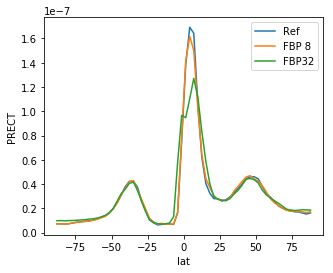

In [19]:
comp_line(lambda d: d['PRECT'].mean(('lon', 'time')))

## Variability

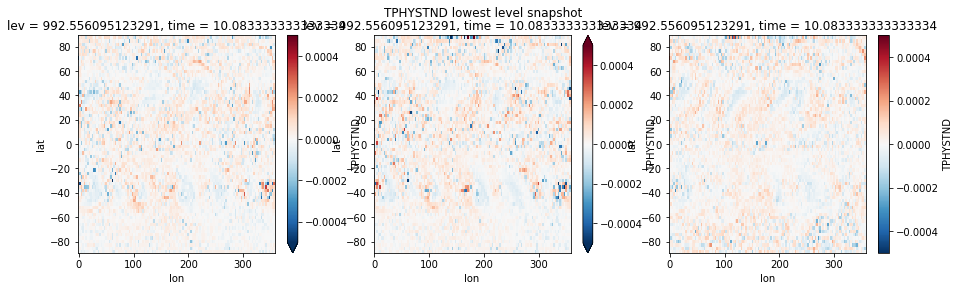

In [20]:
comp(lambda d: d['TPHYSTND'].isel(time=100, lev=-1), vmin=-5e-4, vmax=5e-4, cmap='RdBu_r')
plt.gcf().suptitle('TPHYSTND lowest level snapshot');

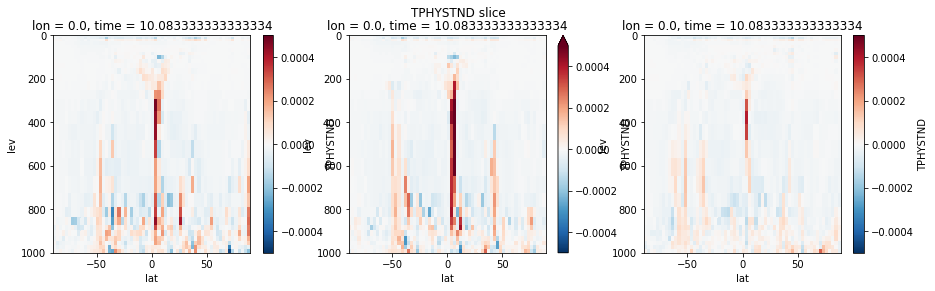

In [21]:
comp(lambda d: d['TPHYSTND'].isel(time=100, lon=0), vmin=-5e-4, vmax=5e-4, cmap='RdBu_r', yincrease=False)
plt.gcf().suptitle('TPHYSTND slice');

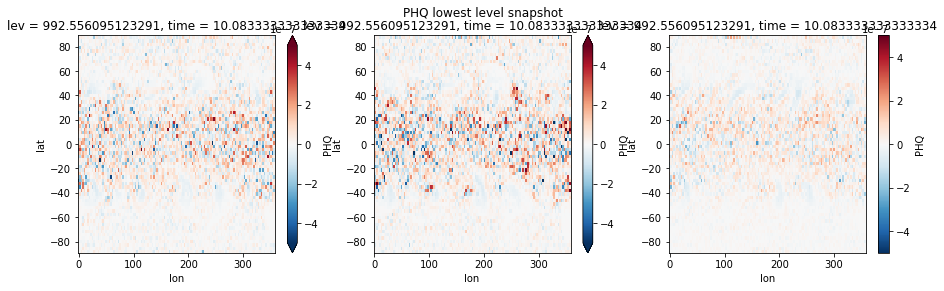

In [22]:
comp(lambda d: d['PHQ'].isel(time=100, lev=-1), vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')
plt.gcf().suptitle('PHQ lowest level snapshot');

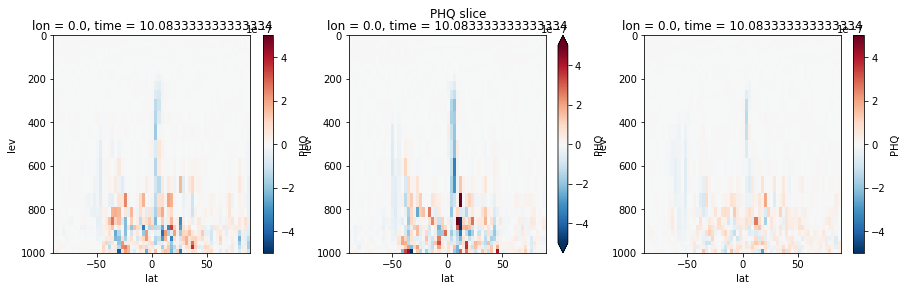

In [23]:
comp(lambda d: d['PHQ'].isel(time=100, lon=0), vmin=-5e-7, vmax=5e-7, cmap='RdBu_r', yincrease=False)
plt.gcf().suptitle('PHQ slice');

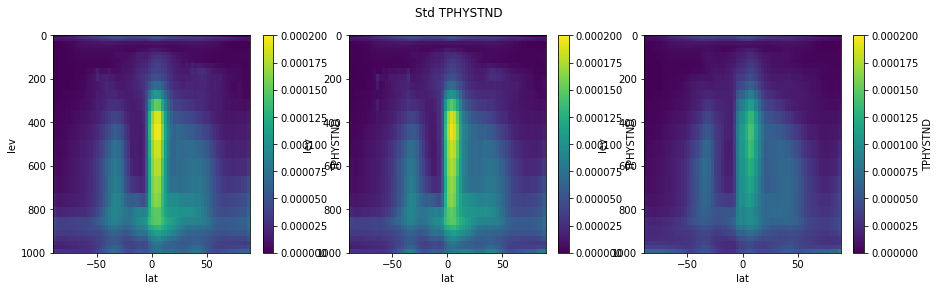

In [24]:
comp(lambda d: d['TPHYSTND'].isel(time=slice(0, None, 4)).std(('lon', 'time')), yincrease=False, 
     vmin=0, vmax=2e-4)
plt.gcf().suptitle('Std TPHYSTND'); 

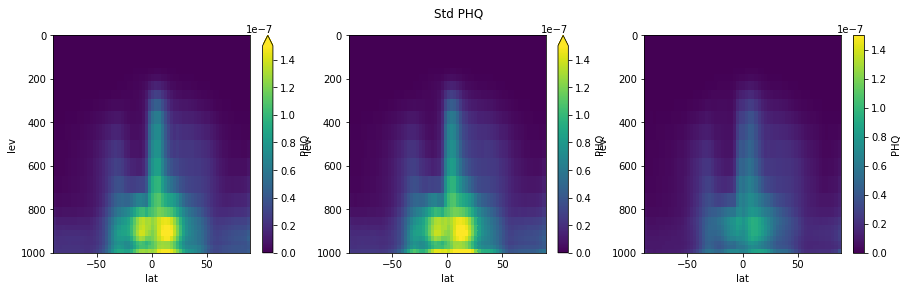

In [25]:
comp(lambda d: d['PHQ'].isel(time=slice(0, None, 4)).std(('lon', 'time')), yincrease=False, 
     vmin=0, vmax=1.5e-7)
plt.gcf().suptitle('Std PHQ');

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


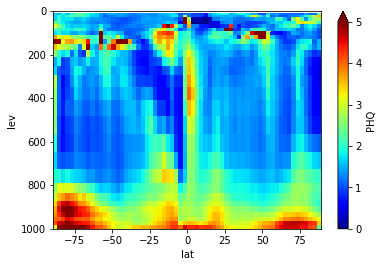

In [26]:
(df8['PHQ'].isel(time=slice(0, None, 4)).var(('lon', 'time')) / 
 df32['PHQ'].isel(time=slice(0, None, 4)).var(('lon', 'time'))).plot(yincrease=False, vmin=0, vmax=5, cmap='jet');

CC06 anyone?